In [1]:
#
# libraries
#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
#

In [2]:
W1_2019 = pd.Period('2019', freq = 'W-MON')
W1_2019

Period('2019-01-01/2019-01-07', 'W-MON')

In [3]:
W1_2019 + 1

Period('2019-01-08/2019-01-14', 'W-MON')

In [4]:
Weeks_2020 = pd.date_range('2020-01-01', '2020-12-31', freq = 'W')
print(Weeks_2020[:6])
shift = pd.Timedelta('6 days')
print((Weeks_2020 + shift)[:6])

DatetimeIndex(['2020-01-05', '2020-01-12', '2020-01-19', '2020-01-26',
               '2020-02-02', '2020-02-09'],
              dtype='datetime64[ns]', freq='W-SUN')
DatetimeIndex(['2020-01-11', '2020-01-18', '2020-01-25', '2020-02-01',
               '2020-02-08', '2020-02-15'],
              dtype='datetime64[ns]', freq=None)


In [5]:
sensor_times = (pd.date_range('00:00:00.0',
                              '00:00:00.00001', 
                              freq = 'n') -
                pd.to_datetime('00:00:00.0')).total_seconds()
sensor_times

Float64Index([                   0.0,                  1e-09,
                               2e-09, 3.0000000000000004e-09,
                               4e-09,                  5e-09,
               6.000000000000001e-09,  7.000000000000001e-09,
                               8e-09,  9.000000000000001e-09,
              ...
               9.991000000000001e-06,              9.992e-06,
                           9.993e-06,  9.994000000000001e-06,
                           9.995e-06,              9.996e-06,
               9.997000000000001e-06,              9.998e-06,
                           9.999e-06,                  1e-05],
             dtype='float64', length=10001)

In [6]:
sensor_times = ((pd.date_range('00:00:00', '00:09:59.9', freq = '100ms')) -
                pd.to_datetime('00:00:00'))
sensor_times

TimedeltaIndex([       '0 days 00:00:00', '0 days 00:00:00.100000',
                '0 days 00:00:00.200000', '0 days 00:00:00.300000',
                '0 days 00:00:00.400000', '0 days 00:00:00.500000',
                '0 days 00:00:00.600000', '0 days 00:00:00.700000',
                '0 days 00:00:00.800000', '0 days 00:00:00.900000',
                ...
                       '0 days 00:09:59', '0 days 00:09:59.100000',
                '0 days 00:09:59.200000', '0 days 00:09:59.300000',
                '0 days 00:09:59.400000', '0 days 00:09:59.500000',
                '0 days 00:09:59.600000', '0 days 00:09:59.700000',
                '0 days 00:09:59.800000', '0 days 00:09:59.900000'],
               dtype='timedelta64[ns]', length=6000, freq=None)

In [7]:
raw_data = (np.sin(2 * np.pi * np.arange(6000) / 500) + 
            np.random.normal(5, 5, 6000))

In [8]:
sensor_data = pd.DataFrame({'data' : raw_data}, 
                           index = (sensor_times))
sensor_data

,data
0 days 00:00:00,9.796275
0 days 00:00:00.100000,12.364477
0 days 00:00:00.200000,9.876423
0 days 00:00:00.300000,4.420598
0 days 00:00:00.400000,9.638754
...,...
0 days 00:09:59.500000,-0.334826
0 days 00:09:59.600000,2.916996
0 days 00:09:59.700000,7.778292
0 days 00:09:59.800000,9.611935


<AxesSubplot:>

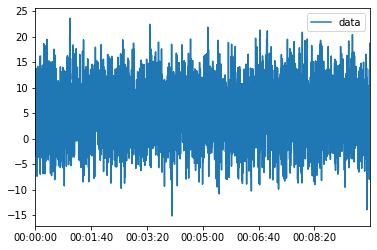

In [9]:
sensor_data.plot()

In [10]:
sensor_data_smooth = sensor_data.resample('5000ms').mean()
sensor_data_smooth

,data
0 days 00:00:00,5.100695
0 days 00:00:05,5.202455
0 days 00:00:10,4.806813
0 days 00:00:15,5.974976
0 days 00:00:20,6.096606
...,...
0 days 00:09:35,5.181006
0 days 00:09:40,4.358089
0 days 00:09:45,4.361321
0 days 00:09:50,4.092078


<AxesSubplot:>

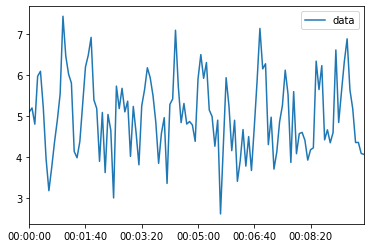

In [11]:
sensor_data_smooth.plot()

<AxesSubplot:>

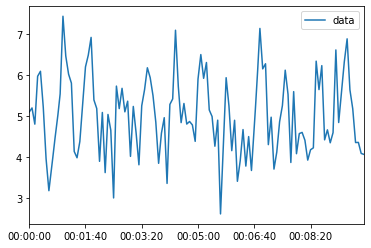

In [12]:
sensor_data_1s = sensor_data_smooth.resample('1s').interpolate()
sensor_data_1s.plot()

<AxesSubplot:>

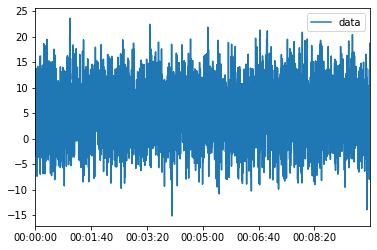

In [13]:
sensor_data = pd.DataFrame({'data' : raw_data}, 
                           index = (sensor_times))
sensor_data.plot()

            receipts
date                
2021-07-01        25
2021-07-02        75
2021-07-03        33
2021-07-04        17
2021-07-05        25
2021-07-06         6
2021-07-07        25
2021-07-08        50
2021-07-09        57
2021-07-10        75
2021-07-11        75
2021-07-12        33
2021-07-13         6
2021-07-14        75
2021-07-15        25
2021-07-16        75
2021-07-17        17
2021-07-18        57
2021-07-19        17
2021-07-20        75
2021-07-21        50
2021-07-22        25
2021-07-23        17
2021-07-24        17
2021-07-25        33
2021-07-26        25
2021-07-27         6
2021-07-28         6
2021-07-29        25
2021-07-30        75


<AxesSubplot:xlabel='date'>

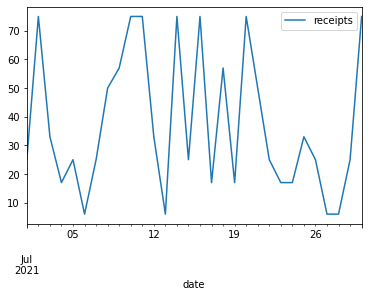

In [14]:
lemonade_income = \
    pd.DataFrame({'date' : pd.date_range('07-1-2021',
                                         '07-30-2021'),
                  'receipts' : pd.Series([50, 75, 
                                          25, 33, 
                                          17, 6, 
                                          57]).sample(30, 
                                                      replace = True,
                                                      random_state = 6)})
lemonade_income.set_index('date', drop = True, inplace = True)
print(lemonade_income)
lemonade_income.plot()

<AxesSubplot:xlabel='date'>

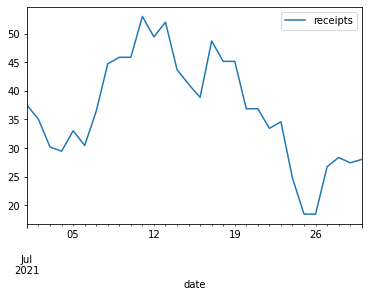

In [15]:
lemonade_income.rolling(window = 7, 
                        center = True, 
                        min_periods = 0).mean().plot()

<AxesSubplot:>

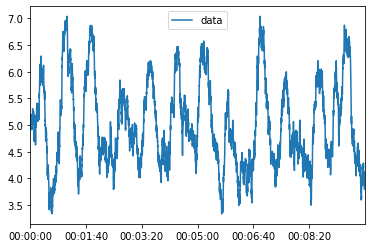

In [16]:
sensor_data.rolling(window = 100, 
                    center = True,
                    min_periods = 0).mean().plot()

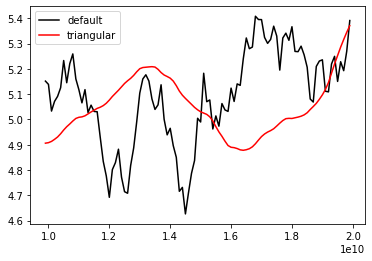

In [17]:
fig, ax = plt.subplots()
ax.plot(sensor_data.iloc[:200, :].rolling(window = 100, 
                                          win_type = None).mean(),
        label = 'default',
        color = 'black')
ax.plot(sensor_data.iloc[:200, :].rolling(window = 100, 
                                          win_type = 'triang').mean(),
        label = 'triangular',
        color = 'red')
ax.legend()
plt.show()

In [18]:
#
# utility function to plot out a grid of plots
# with a .rolling(window = win_size).mean()
#
def plot_rolling_grid(data, windows):
    n_plots = len(windows)
    rows = int(np.sqrt(n_plots))
    if rows > 0:
        cols = int(np.ceil(n_plots / rows))
    else:
        rows = 1
        cols = 1
    fig = plt.figure(figsize = (11, 11))
    for row in range(rows):
        for col in range(cols):
            plot_index = (row + 1) * cols + col - 1
            if plot_index <= n_plots:
                grid_loc = str(rows + 1) + str(cols + 1) + str(plot_index + 1)
                grid_loc = int(grid_loc) - 111
                ax = fig.add_subplot(grid_loc)
                ax.plot(data.index, data.iloc[:, 0].rolling(window = windows[plot_index - 1],
                                                            center = True,
                                                            min_periods = 0).mean())
                ax.set_title('window = ' + str(windows[plot_index - 1]))
    fig.tight_layout()
    plt.show()

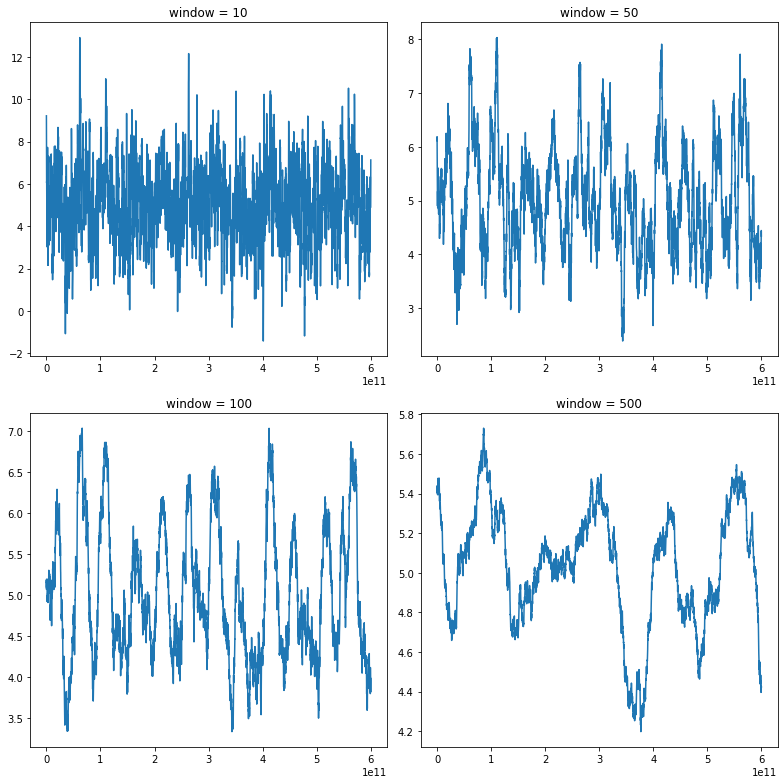

In [19]:
plot_rolling_grid(sensor_data, windows = [10, 50, 100, 500])